## Assignment 5 - Ensemble learning
### Exercise 2

In [1]:
p_r = 0.85
p_d = 0.75
p_s = 0.6

n_r = 1
n_d = 3
n_s = 31

#### a)

In [2]:
p_all3 = p_d**3
print(f"p(3 right) = {round(p_all3, 3)}")

# exactly 2 right + exactly 3 right
p_atleast2 = 3 * p_d**2 * (1-p_d)**1 + 1 * p_d**3 * (1-p_d)**0
print(f"p(at least 2 right) = {round(p_atleast2, 3)}")

p(3 right) = 0.422
p(at least 2 right) = 0.844


The probability should be 0.844

#### b)

In [105]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

def get_prob_maj_correct(c, p, maj=None):
    if maj is None:
        maj = math.floor(c/2)

    p_correct_decision = 0 
    if c%2 == 0:
        p_correct_decision += 0.5 * binom(c, maj) * p**maj * (1-p)**(c-maj) 
    for k in range(maj+1, c+1):
        p_current = binom(c, k) * p**k * (1-p)**(c-k)
        p_correct_decision += p_current

    return p_correct_decision

print(f"p of {n_r} radiologist =", get_prob_maj_correct(n_r, p_r))
print(f"p of {n_d} doctors =", get_prob_maj_correct(n_d, p_d))
print(f"p of {n_s} students =", get_prob_maj_correct(n_s, p_s))

p of 1 radiologist = 0.85
p of 3 doctors = 0.84375
p of 31 students = 0.8716182723048189


#### c)

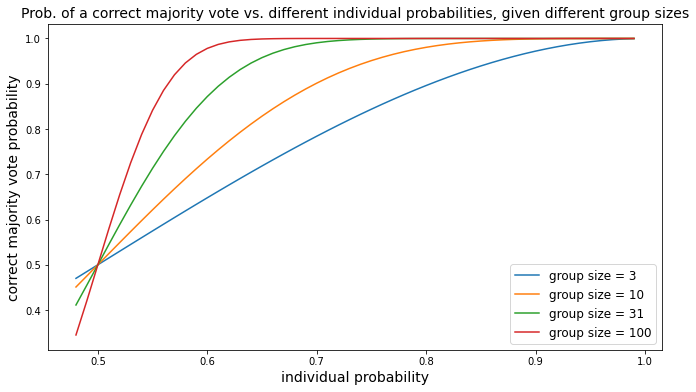

In [102]:
def plot_diff_probs(sizes, conf_levels=np.arange(0.5, 1.0, 0.01)):
    plt.figure(figsize=(11,6))
    for size in sizes:
        probs = []
        for j, c_lvl in enumerate(conf_levels):
            probs.append(get_prob_maj_correct(size, c_lvl))
        lbl=f"group size = {size}"
        plt.plot(conf_levels, probs, label=lbl)
    plt.xlabel("individual probability", fontsize=14)
    plt.ylabel("correct majority vote probability", fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.savefig("plots/a5e3c-groupsizes-wo-title")
    plt.title(f"Prob. of a correct majority vote vs. different individual probabilities, given different group sizes", fontsize=14)
    plt.savefig("plots/a5e3c-groupsizes-with-title")
    plt.show()

sizes = [3, 10, 31, 100]
conf_levels = np.arange(0.48, 1.0, 0.01)
plot_diff_probs(sizes, conf_levels)

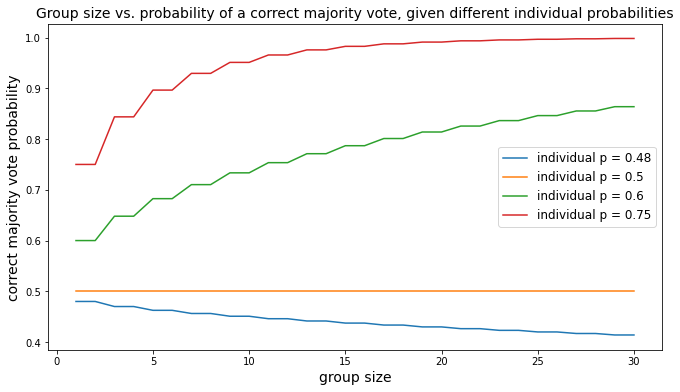

In [103]:
def plot_diff_size(conf_levels, sizes=np.arange(1, 31, 1)):
    plt.figure(figsize=(11,6))
    for conf_level in conf_levels:
        probs = []
        for i, size in enumerate(sizes):
            probs.append(get_prob_maj_correct(size, conf_level))
        lbl=f"individual p = {conf_level}"
        plt.plot(sizes, probs, label=lbl)
    plt.xlabel("group size", fontsize=14)
    plt.ylabel("correct majority vote probability", fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.savefig("plots/a5e3c-indiv-p-wo-title")
    plt.title(f"Group size vs. probability of a correct majority vote, given different individual probabilities", fontsize=14)
    plt.savefig("plots/a5e3c-indiv-p-with-title")
    plt.show()

plot_diff_size(conf_levels=[0.48, 0.5, 0.6, 0.75])

d)

In [110]:
print(f"p of {n_r} radiologist =", get_prob_maj_correct(n_r, p_r))
print(f"p of {n_d} doctors =", get_prob_maj_correct(n_d, p_d))
print(f"p of {n_s} students =", get_prob_maj_correct(n_s, p_s))
print("Students have the highest probability\n\n")

i=10
j=0
while get_prob_maj_correct(i, p_s) < p_atleast2:
    i+=1
group_with_smaller_p = get_prob_maj_correct(i-1, p_s)
group_with_greater_p = get_prob_maj_correct(i, p_s)
print(f"p of the doctors: {p_atleast2}")
print(f"for i={i-1}, p={group_with_smaller_p}")
print(f"for i={i}, p={group_with_greater_p}")
print(f"difference of {i-1} students vs {n_d} doctors: {p_atleast2 - group_with_smaller_p :.5f}")
print(f"difference of { i } students vs {n_d} doctors: {group_with_greater_p - p_atleast2 :.5f}")
group_with_smallest_diff = i-1 if (p_atleast2-group_with_smaller_p) < (group_with_greater_p - p_atleast2) else i
print(f"Therefore, a group size of {group_with_smallest_diff} is most equal to the prediction of the group of doctors")

p of 1 radiologist = 0.85
p of 3 doctors = 0.84375
p of 31 students = 0.8716182723048189
Students have the highest probability


p of the doctors: 0.84375
for i=24, p=0.8363565593601072
for i=25, p=0.846232231024237
difference of 24 students vs 3 doctors: 0.00739
difference of 25 students vs 3 doctors: 0.00248
Therefore, a group size of 25 is most equal to the prediction of the group of doctors


#### e)

See pdf

### exercise 3

#### (a) & (b)

In [112]:
def get_prob(p, k, c):
    return binom(k, c) * p**c * (1-p)**(k-c)

def majority_vote(p_wk, p_st, w_st, w_wk=1, n_wk=10, n_st=1):
    """
    :w_wk: weight of weak classifiers
    :n_wk: number of weak classifiers
    :n_st: number of strong classifiers
    """
    tot_w = w_st * n_st + w_wk * n_wk
    req_maj = math.floor(tot_w/2)

    prob = 0
    for n_wk_correct in range(0, n_wk+1):
        for n_st_correct in range(0, n_st+1):
            weighted_votes = w_wk * n_wk_correct + w_st * n_st_correct
            if tot_w%2 == 0 and weighted_votes == req_maj:
                prob_wk = get_prob(p_wk, n_wk, n_wk_correct) 
                prob_st = get_prob(p_st, n_st, n_st_correct)
                prob += prob_wk * prob_st * 0.5
            if weighted_votes > req_maj:
                prob_wk = get_prob(p_wk, n_wk, n_wk_correct) 
                prob_st = get_prob(p_st, n_st, n_st_correct)
                prob += prob_wk * prob_st
    return prob

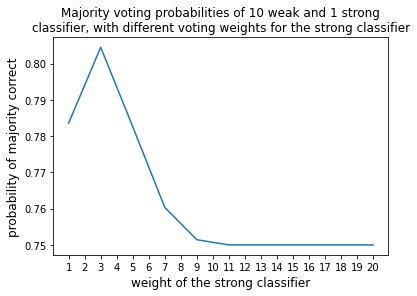

p=0.733, for the 10 weak classifiers being correct in a majority vote.
p=0.750, for the strong classifier being correct on its own.
p=0.784, for the combined classifiers if each classifier's vote has the same weight (w=1).
With p=0.804, a weight of w=3 is the optimal weight for the strong classifier.


In [116]:
ps = []
ws = np.arange(1, 21, 1)
for w in ws:
#     weights = [w] + [1]*len(clf_weak)
    ps.append(majority_vote(0.6, 0.75, w))
plt.plot(ws, ps)
plt.xlabel("weight of the strong classifier", fontsize=12)
plt.ylabel("probability of majority correct", fontsize=12)
plt.title("Majority voting probabilities of 10 weak and 1 strong\nclassifier, with different voting weights for the strong classifier")
plt.xticks(ws)
plt.savefig("plots/a5ex3b")
plt.show()

round_by = 3
max_p = max(ps)
w = ws[ps.index(max(ps))]
p_weak = get_prob_maj_correct(10, .6)
p_strong = get_prob_maj_correct(1, .75)
p_equal_weights = majority_vote(0.6, 0.75, 1)
print(f"p={round(p_weak, round_by)}, for the 10 weak classifiers being correct in a majority vote.")
print(f"p={p_strong:.{round_by}f}, for the strong classifier being correct on its own.")
print(f"p={round(p_equal_weights, round_by)}, for the combined classifiers if each classifier's vote has the same weight (w=1).")
print(f"With p={round(max_p, round_by):.{round_by}f}, a weight of w={w} is the optimal weight for the strong classifier.")

In [137]:
wk1 = 0
for k in range(5,11):
    wk1 += binom(10, k) * 0.6**k * (1-.6)**(10-k)
print(wk1)
wk1 *= .75
print(wk1)

wk2 = 0
for k in range(6,11):
    wk2 += binom(10, k) * 0.6**k * (1-.6)**(10-k)
print(wk2)
wk2 *= 1-.75
print(wk2)
print("wk1+wk2 =",wk1+wk2)

0.8337613824000001
0.6253210368000001
0.6331032576
0.1582758144
wk1+wk2 = 0.7835968512


#### (c)

In [139]:
# AdaBoost.M1 algorithm
# As far as I understood, the classifier probabilites respond to the 
# classification error on the training set.
# Therefore, we can start directly from alpha_m

p_wk = 0.733 # 0.6  # 0.733 if we consider 10 weak classifiers, 0.6 if we only consider 1 weak classifier
p_st = 0.75
err_m_wk = 1 - p_wk
err_m_st = 1 - p_st

alpha_m_wk = np.log((1-err_m_wk)/err_m_wk)
alpha_m_st = np.log((1-err_m_st)/err_m_st)

w_old_wk = 1
w_old_st = 1
w_new_wk = w_old_wk * np.exp(alpha_m_wk)
w_new_st = w_old_st * np.exp(alpha_m_st)

p_adaboosted = majority_vote(p_wk, p_st, w_st=w_new_st, w_wk=w_new_wk)

print("The errors / probabilities of the classifiers are:")
print(f" - err_m_wk = {round(err_m_wk, round_by):.{round_by}f}")
print(f" - err_m_st = {round(err_m_st, round_by):.{round_by}f}")

print("\nThe alpha_ms are: ")
print(f" - wk_alpha_m = {round(alpha_m_wk, round_by):.{round_by}f}")
print(f" - st_alpha_m = {round(alpha_m_st, round_by):.{round_by}f}")

print("\nWith old weights of:")
print(f" - w_old_wk = {round(w_old_wk, round_by):.{round_by}f}")
print(f" - w_old_st = {round(w_old_st, round_by):.{round_by}f}")

print(f"\nAdaBoost.M1 suggests the following optimal weights:")
print(f" - w_new_wk = {round(w_new_wk, round_by):.{round_by}f}")
print(f" - w_new_st = {round(w_new_st, round_by):.{round_by}f}")
print("\nCompared to our previous answer in (b):")
if p_adaboosted > max_p:
    print(f" The previous best probability was {round(max_p, round_by)}."
          f"\n AdaBoost.M1 improved the probability to {round(p_adaboosted, round_by)} of a correct weighted majority vote.")
else:
    print(f" AdaBoost.M1 did not improve the probability of a correct weighted majority vote."
          f"\n The reached probability is {round(p_adaboosted, round_by)}.")

The errors / probabilities of the classifiers are:
 - err_m_wk = 0.267
 - err_m_st = 0.250

The alpha_ms are: 
 - wk_alpha_m = 1.010
 - st_alpha_m = 1.099

With old weights of:
 - w_old_wk = 1.000
 - w_old_st = 1.000

AdaBoost.M1 suggests the following optimal weights:
 - w_new_wk = 2.745
 - w_new_st = 3.000

Compared to our previous answer in (b):
 The previous best probability was 0.804.
 AdaBoost.M1 improved the probability to 0.955 of a correct weighted majority vote.


#### (d)

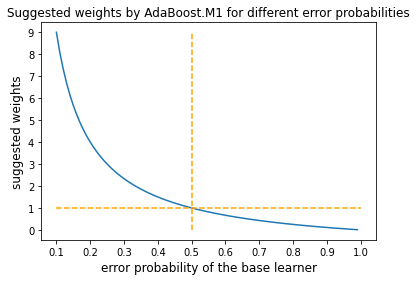

In [122]:
# plot the weight given to a base-learner in the AdaBoost algorithm for different values of the error the base-learner makes

weights = []
weight_old = 1
errors = np.arange(0.1, 1.0, 0.01)
for err_base_learner in errors:
    alpha_m = np.log((1-err_base_learner)/err_base_learner)
    weights.append(weight_old * np.exp(alpha_m))

# plot the result
plt.plot(errors, weights)
v_05 = weights[np.where(np.round(errors, 2)==0.5)[0][0]] 
plt.plot([min(errors), 1], [v_05, v_05], '--', color='orange')
plt.vlines(0.5, 0, 9, colors='orange', linestyles='--')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0, max(weights), 1))
plt.xlabel("error probability of the base learner", fontsize=12)
plt.ylabel("suggested weights", fontsize=12)
plt.title("Suggested weights by AdaBoost.M1 for different error probabilities")
plt.savefig("plots/a5ex3d")
plt.show()

We see that with an error of $>0.5$, i.e. a probability of being correct of $<0.5$, the suggested weights by AdaBoost.M1 are smaller than 1. The greater the error, the closer the suggested weights are to 0.

At $0.5$ error/probability, the suggested weight is 1. 

For stronger learners $>0.5$, AdaBoost.M1 suggests weights greater than 1. The weight value grows exponentially the smaller the error. For example, an error of 0.1 results in a suggested weight of 9 for that classifier.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>